<h1> Depth estimation yoki masofani aniqlash </h1>
<h2> 2 o'lchovli rasmdan 3d o'lchovga qaytish </h2>

<h3> Stereo camera orqali masofani aniqlash </h3>

Odamda 2 ko'z bor ular 2 xil rasm ni miyyaga beradi, 2  rasm bir biridan biroz farq qiladi bu farq disparity deb ataladi yani birinchi rasmdagi malum bir nuqtaning 2 chi rasmdagi kordinatasi ozgina surilgan bo'ladi bu shift deb ataladi. Disparity esa bizga rasmdagi yashirin axborot yani depth (chuqurlik) haqidagi ma'lumotni beradi. 

<img src='jpg/disparity.jpg'/>


Stereo camera da ham 2 ta camera bo'ladi va biz ulardan olingan rasmlardan disparityni ajratib olib depthni aniqlaymiz. 

<img src='jpg/stereo_geometry.jpg' height="500" width="300"/>


Bu yerda Z biz topishimiz kerak bo'lgan Cameralar C1 and C2 dan world plandagi W(X, Y, Z) target nuqtagacha bo'lgan distance (uzoqlik). B esa 2 kamera markazlari orasidagi masofa yani baseline va f focal length. X1 va X2 W nuqtaning chap va o'ng rasmlardagi joylashuvlari (kordinatasi).  

Bu yerda ko'rib turganizdek o'xshash uchburchaklar ko'p, biz esa ulardan faqat bir juftini yani C1, C2, W va X1, X2, W. Bu o'xshash uchburchaklardan biz osongina Z ni topib olsak bo'ladi:

<img src='jpg/disp_form.jpg' height="500" width="300"/>

Bu yerda formulation da osonroq bo'lishi uchun ayirmani emas yig'indini disparity deb olib ketishgan . 


<h4> Rectification </h4>

Stereo kameralardagi depth estimationda eng qiyin vazifalardan biri bu 2 ta rasmdan bir nuqtani topish, oddiy xolatda uni rasmimiz 2d bo`lganligi uchun butun rasm bo`yicha 2d o`lchamda qidirishga to`g`ri keladi, bu jarayonni osonlashtiruvchi va 1d ga keltiruvchi jarayon rectification deb ataladi, bizning kameralarimizni bir biriga parallel joylashgan va ular bir xil deb tasavvur qilamiz aks xolda bu masala juda qiyin bo'lib ketadi. shunda quyidagicha xolat bo'ladi:



<img src='jpg/rectification.JPG' height="500" width="300"/>

Yani 2 rasm parallel joylashganligi uchun biz qidiruvni faqat rasmda ko'rsatilgan qizil chegarada amalga oshirsak yetarli : ). Agar biz qandaydir window olib olsak balandligi va kengligi ushbu qizil maydonning balandligi bilan teng bo'lsin, biz 2 rasmdagi bir xil nuqtani topish uchun 1 d qidiruvni amalga oshirsak bo'ldi va hozzirgi ko'pgina algoritmlar shunday ishlaydi. Bu jarayon rectified deb nomlanadi chunki biz rasmlarni to'rtburchak ko'rinishiga olib kelyapmiz. 

Endi faqat qidirish qoldi, qidirish jarayonida biror bir loss function ni solishtirish uchun belgilab ilamiz masalan mean square loss E va uni grafikini chizamiz, undan eng kichkinasi biz qidirayotgan nuqta bo'ladi. Odatda qidirish uchun asos qilib chap rasm olinadi.

<img src='jpg/finding_dots.jpg' height="300" width="500"/>

Bu window size ni qanchalik kichik olsangiz accuracy(aniqlik) shunchalik yuqori bo'ladi ammo ko'p vaqtni oladi (saqlanish qonuni : ) ).

<h4> Disparity </h4>
Disparity ni topish uchun juda ko'p usullar bor ularning ko'pchiligi correlationga asoslangan:
1. Sum square difference 
2. Absulute difference
3. Cross Correlation
4. Normilized Correlation
5. Mutual Correlation

Qisqasini aytganda yana ko'pgina disparityni topishga bog'liq bo'lgan formulalar bor, bu yerda ularni o'rganmoqchi emasmiz. Disparityga qarab accuracy o'zgaradi. Biz esa o'z kodlarimizda Cross Correlationni ishlatib ketsak ham bo'laveradi. Ko'pincha oddiylik yaxshiroqdir, simpler<=>better :)

references:

https://www.youtube.com/watch?v=jzis4WE3Vc8

https://www.slideshare.net/duncale/edu290-depth-perception-presentation

https://www.coursera.org/learn/visual-perception-self-driving-cars/home/welcome


<h3> Code for Disparity calculation </h3>

Depth image calculation opencv da <b>block matching </b> algoritmlari orqali amalga oshiriladi. Birinchi biz <b> matcher</b> degan obekt yaratib olishimiz kerak u bizning hamma disparity calculationda kerakli attributlarimizni saqlab turadi va bizga disparity image ni topib beradigan compute degan metodni taqdim etadi. Bu algoritm opencvda <b> StereoBM </b> deb ataladi va u <b> StereoMatcher </b> clasidan kelib chiqqan. 

StereoBM dan tashqari yana <b> StereoSGBM </b> degan algoritm ham bor, ularning ikkalasi ham block matching algoritmi bo`lib umuman olganda bir xil vazifani bajaradi, yani berilgan chap va o`ng camera rasmlarini bir <b> depth rasm</b> ga convert qiladi. Depth rasmdagi har bir pixel esa rasmda ifodalangan pixellarning 3d world plandagi biz image planga o`tish jarayonida yo`q qilgan 3-axis,z axisga mos keladi, yani uzoqlikka proporsional bo`ladi.



In [1]:
#birinchi kerakli library larni import qilib olamiz
import numpy as np
import cv2
from matplotlib import pyplot as plt
from matplotlib import patches
import time

%matplotlib inline
%load_ext autoreload
%autoreload 2
%precision %.2f



'%.2f'

(960, 1280, 3)


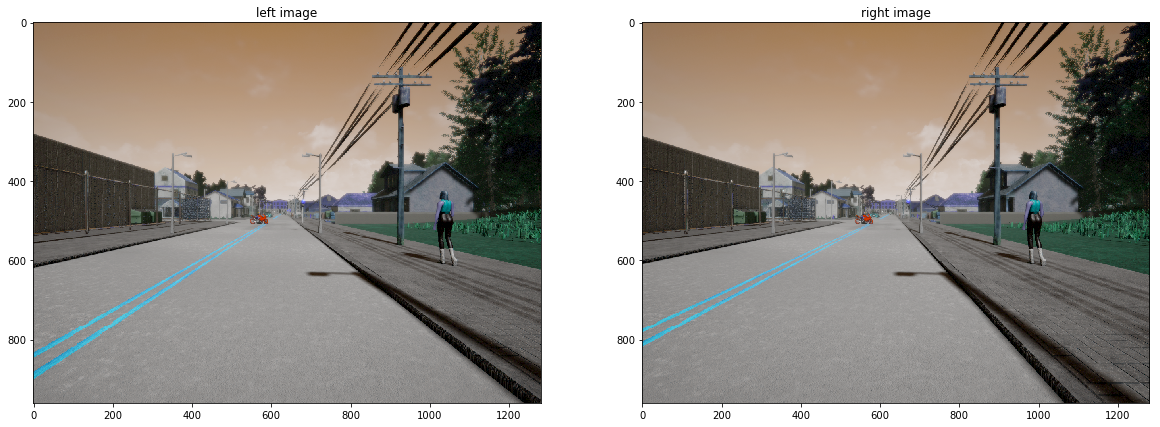

In [2]:
#kelinglar endi 2 ta image ni yuklab olamiz bunda biz 

img_left = cv2.imread('jpg/framel.png',cv2.IMREAD_COLOR)
img_right = cv2.imread('jpg/framer.png',cv2.IMREAD_COLOR)

print(np.shape(img_left))

# show them 
# Use matplotlib to display the two images
_, image_cells = plt.subplots(1, 2, figsize=(20, 20))
image_cells[0].imshow(img_left)
image_cells[0].set_title('left image')
image_cells[1].imshow(img_right)
image_cells[1].set_title('right image')
plt.show()

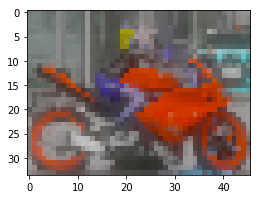

In [3]:
# Kelinglar shu yerda target location ni olib qo`yaylik keyinchalik shu targetnining uzoqligini aniqlaymiz
# biz bu yerdan maped mingan odamdni cameradan qancha uzoqda ekanligini topmoqchimiz
# eslab qoling bu yerda y axis bo`yicha image_leftning 0 -indexiga x axis bo`yicha 1-idexiga muroja`at qilamiz
target_image = img_left[ 475:509, 547:593, :]


plt.figure(figsize=(4, 4))
plt.imshow(target_image)
plt.show()

In [4]:
# va bizga kamera callibration ham kerak bo`ladi, bu rasmni o`zim tushurmaganim uchun bunga o`zimni kameramni 
# callibration matrixini ishlata olmayman, rasmning avtorlari callibration matrixni ham berishgan :
# https://www.coursera.org/learn/visual-perception-self-driving-cars/home/welcome

pl = np.array([[640.0,   0.0, 640.0, 2176.0], 
               [  0.0, 480.0, 480.0,  552.0], 
               [  0.0,   0.0,  1.0,    1.4]])
pr = np.array([[640.0,   0.0,  640.0,  2176.0], 
               [   0.0, 480.0, 480.0,   792.0], 
               [   0.0,   0.0,   1.0,    1.4]])

print(pl)
print(pr)


[[6.400e+02 0.000e+00 6.400e+02 2.176e+03]
 [0.000e+00 4.800e+02 4.800e+02 5.520e+02]
 [0.000e+00 0.000e+00 1.000e+00 1.400e+00]]
[[6.400e+02 0.000e+00 6.400e+02 2.176e+03]
 [0.000e+00 4.800e+02 4.800e+02 7.920e+02]
 [0.000e+00 0.000e+00 1.000e+00 1.400e+00]]


Bilamizki after rectification rasmimizning har bir row(qator) i bu epibolar linedir, shunday ekan bir qatorda maching ishlari olib boriladi. SGBM va  BM algoritmlari SAD (squared absolute difference) windowlardan foydalanadi. Agar cameralar parallel joylashgan bo`lsa 0 yoki undan yuqori disparity hosil bo`ladi, agar kameralar bir biriga biroz qayrilgan bo`lsa faqat x axis bo`yicha (tepaga yoki pastga yoki 2 yonga emas o`rtaga qarab) ularning disparitysi manfiy ham bo`lishi mumkin. 


Disparity ni topish esa avvaldan belgilab olingan disparity soni (num_disparities ) orqali davom ettiriladi, num_disparities  pixel da o`lchanadi va normal disparity 64 ga teng. Agar rasmimiz 32 foat point rasm bo`ladigan bo`lsa integer bo`lmagan disparity ham qaytarilishi mumkin, agar 16 bit integer bo`lsa disparity 4 bit fixed point form ko`rinishida bo`ladi.

<img src='jpg/disp_number.jpg' width=400 height=500/>

<b> Horopter </b> bu qidirish mumkin bo`lgan 3d real world plane dagi maydonni ifodalaydi uni yaxshilash esa bir necha parameterlarga bog`liq. Har bir disparity level disparity soni bilan birgalikda ushbu maydonnig o`lchamini boshqaradi. 
Disparity ning belgilangan qiymatidan tashqaridagi qiymatlar xolatida qora rang yani 0 javob qaytariladi, yani nomalum degani.
Yana ushbu maydonni kengaytirish uchun baseline ni ham kichraytirish mumkin.

references:
Learning OpenCV 3 Adrian Kaehler & Gary Bradski [Stereo Imaging pp:739]


In [5]:
def compute_depth_image(img_left, img_right):
    
    """Bu method bizga disparity image ni hisoblab beradi """
    
    # disparity ni aniqlash uchun kerak bo`ladigan parameterlar
    num_disparities = 112
    block_size = 21
    
    min_disparity = 0
    
    img_left = cv2.cvtColor(img_left, cv2.COLOR_BGR2GRAY)
    img_right = cv2.cvtColor(img_right, cv2.COLOR_BGR2GRAY)
    
    # Stereo BM matcher
    left_matcher_BM = cv2.StereoBM_create(
        numDisparities=num_disparities,
        blockSize=block_size
    )
    
    # Stereo SGBM matcher
    left_matcher_SGBM = cv2.StereoSGBM_create(
        minDisparity=min_disparity,
        numDisparities=num_disparities,
        blockSize=block_size,
        P1=8*3*36,
        P2=32*3*36,
        mode=cv2.STEREO_SGBM_MODE_SGBM_3WAY,
    )
    
    # Compute the left disparity map
    disp_left = left_matcher_SGBM.compute(img_left, img_right).astype(np.float32)/16
    
    ### END CODE HERE ###
    
    return disp_left

0.15 second


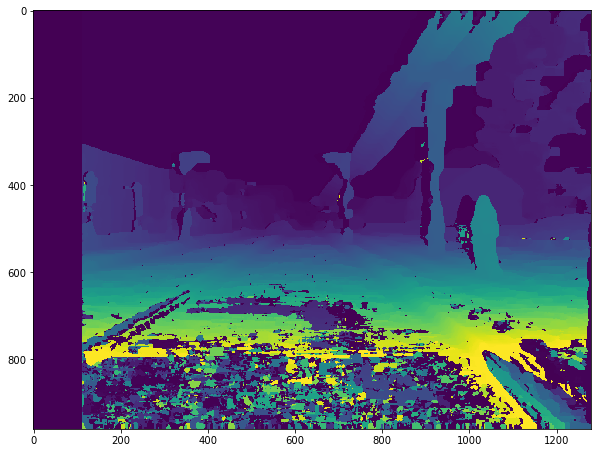

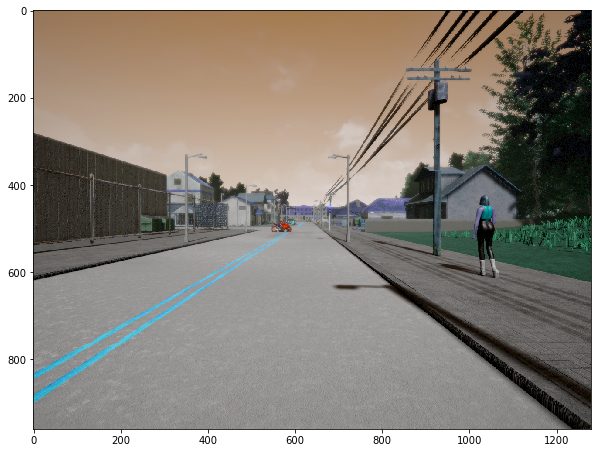

'Ko`rib turganizdek javobimiz juda ham yaxshi, ammo real hayotda bunday natijaga erishish qiyin'

In [6]:
#keling endi ushbu disparity topish methodimiz ni ishlatib ko`raylik
# Compute the disparity map using the fuction above
t1 = time.time()
disp_left = compute_depth_image(img_left, img_right)
print(round(time.time()-t1,2), 'second')
# Show the left disparity map
plt.figure(figsize=(10, 10))
plt.imshow(disp_left)
plt.show()

plt.figure(figsize=(10, 10))
plt.imshow(img_left)
plt.show()


"""Ko`rib turganizdek javobimiz juda ham yaxshi, ammo real hayotda bunday natijaga erishish qiyin"""

opencv da shunday funksiya borki bizga o`rganish uchun imkon qoldirmaydi, yuqorida biz callibration matrixni o`qib olgan
edik yodingizda bo`lsa, kelinglar o`shandan kamera parameter k, rotation matrix r, va transaction matrix t ni ajratib olaylik


In [7]:
# https://docs.opencv.org/2.4/modules/calib3d/doc/camera_calibration_and_3d_reconstruction.html#decomposeprojectionmatrix
# oxiridagi 4 ta elementga etibor bermaymiz
kl, rl, tl, _, _, _, _ = cv2.decomposeProjectionMatrix(pl)
kr, rr, tr, _, _, _,_ = cv2.decomposeProjectionMatrix(pr)

# bilasiz bizning image planimiz 2d va transactionni shu 2d ga moslab olishimiz uchun uni 3-elementiga bo`lib yuboramiz
tl = tl/tl[3]
tr = tr/tr[3]


print(kl)
print(rl)
print(tl)

print(kr)
print(rr)
print(tr)

[[640.   0. 640.]
 [  0. 480. 480.]
 [  0.   0.   1.]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[-2.  ]
 [ 0.25]
 [-1.4 ]
 [ 1.  ]]
[[640.   0. 640.]
 [  0. 480. 480.]
 [  0.   0.   1.]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[-2.  ]
 [-0.25]
 [-1.4 ]
 [ 1.  ]]


Kelinglar endi depth image va berilgan callibration parameterlar orqali depthmapni chiqaramiz, buning uchun bizga focal lenth f , baseline B, va disparity d kerak bo`ladi.
focal lenth ni topish juda ham oson bu kamera parameterning 1- elementidir.
baseline esa 2 ala kamera larning qancha masofada ko`chganligidir 2 kamera parallel bo`lganligi uchun ular faqat x
o`qi bo`yicha surilishi mumkin, yani tl[1] -tr[1]
disparity esa berilgan

In [8]:
f = kl[0][0]
b = tl[1] - tr[1]
# topa olinmagan va chegaradagi elementlarga eng kam qiymatni beramiz
disp_left[ disp_left == -1]= 0.1
disp_left[disp_left == 0] = 0.1

depth_map = np.ones(disp_left.shape, np.single)
depth_map[:] = f * b / disp_left[:]


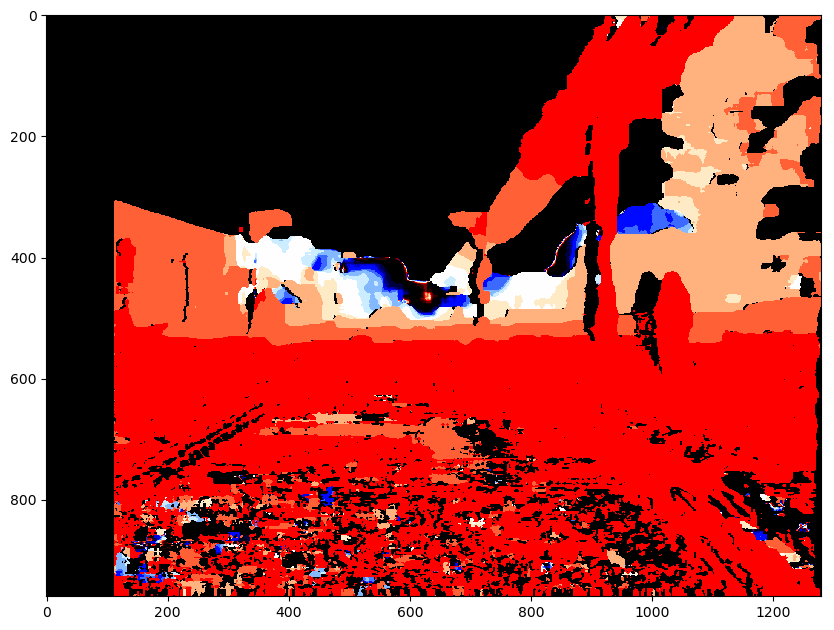

In [15]:
# Display the depth map
plt.figure(figsize=(10, 10),dpi=100)
plt.imshow(depth_map, cmap='flag')
plt.show()

In [10]:
# opencv orqali biror bir obektni rasmdan topish uchun quyidagicha yondashiladi:

# cross correlation orqali matching amalga oshirilyapti
cross_corr_map = cv2.matchTemplate(img_left, target_image,  method=cv2.TM_CCOEFF)

#eng katta correlationga ega bo`lgan joy bizning obyekt joylashgan joy bo`ladi
_, _, _, target_location = cv2.minMaxLoc(cross_corr_map)

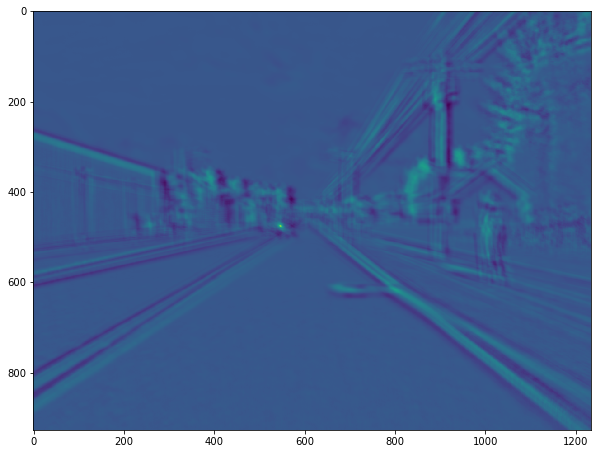

target koordinatasi 
 (547, 475)


In [12]:
#korrelation ni chiqarib ko`ramiz oq joylarning correlationi yuqorirroq dep hisoblanadi
plt.figure(figsize=(10, 10))
plt.imshow(cross_corr_map)
plt.show()
#topilgan location ni chiqarish
print("target koordinatasi \n", target_location)

endi bizda faqat shu obektning uzoqligini topish qoldi holos, buning uchun depth_mapdan targetimiz joylashgan joyni topib olamiz

In [31]:
#boshlang`ich kordinatalarni olib olamiz (rasmda x matritsaning columni yani murojatda 2-elementni bildiradi)
x0 = target_location[1]
y0 = target_location[0]
#shape da esa teskarisi yani shape[0] width ni beradi shape[1] esa height ni 
x1 = x0+target_image.shape[0]
y1 = y0+target_image.shape[1]

target_depth = depth_map[x0:x1, y0:y1]
# Create the obstacle bounding box 
obstacle_bbox = patches.Rectangle((y0, x0), target_image.shape[1], target_image.shape[0], 
                             linewidth=1, edgecolor='r', facecolor='none')
#eng yaqinini ajratib olamiz
closest = np.min(target_depth)

In [32]:
print('biz qidirgan masofa', round(closest, 2),'meter')

biz qidirgan masofa 28.93 meter
